
# Trabajo Práctico 2


Descargar el dataset **Facebook comment volume** https://archive.ics.uci.edu/ml/datasets/Facebook+Comment+Volume+Dataset. 

El dataset tiene diferentes versiones, utilizaremos la **número 5** para train y para test **Features_TestSet**. 

Notar que trae **carpeta de train y de test**. 

Una descripcióm completa del dataset pueden encontrarla en el link. Se trata de publicaciones de Facebook y se quiere **predecir la columna 54: cantidad de comentarios en las próximas H horas"**.

El dataset contiene variables en muchos formatos diferentes, algunos de los cuales no hemos trabajado o no lo hemos hechos en profundidad. Esas variables pueden ser descartadas o bien hacer una investigación personal para ver de qué manera poder incluirlas para mejorar los resultados obtenidos.



# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [1]:
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import SGDRegressor

# Cargar datos
Cargar los datos de entrenamiento.

In [2]:
data = pd.read_csv("./Dataset/Training/Features_Variant_5.csv")

In [3]:
data.head()

634995  0  463  1  0.0  1280.0  13.158778625954199  1.0  94.9936396988823  \
0  634995  0  463  1  0.0  1280.0           13.158779  1.0          94.99364   
1  634995  0  463  1  0.0  1280.0           13.158779  1.0          94.99364   
2  634995  0  463  1  0.0  1280.0           13.158779  1.0          94.99364   
3  634995  0  463  1  0.0  1280.0           13.158779  1.0          94.99364   
4  634995  0  463  1  0.0  1280.0           13.158779  1.0          94.99364   

   0.0.1  ...  0.11  0.12  0.13  0.14  0.15  0.16  1.2  0.17  0.18  0.19  
0    0.0  ...     0     0     1     0     0     0    0     0     0     0  
1    0.0  ...     1     0     0     0     0     0    0     0     1     0  
2    0.0  ...     1     0     0     1     0     0    0     0     0     0  
3    0.0  ...     0     0     0     0     0     0    1     0     0     0  
4    0.0  ...     0     0     0     0     0     1    0     0     0     0  

[5 rows x 54 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199029 entries, 0 to 199028
Data columns (total 54 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   634995               199029 non-null  int64  
 1   0                    199029 non-null  int64  
 2   463                  199029 non-null  int64  
 3   1                    199029 non-null  int64  
 4   0.0                  199029 non-null  float64
 5   1280.0               199029 non-null  float64
 6   13.158778625954199   199029 non-null  float64
 7   1.0                  199029 non-null  float64
 8   94.9936396988823     199029 non-null  float64
 9   0.0.1                199029 non-null  float64
 10  806.0                199029 non-null  float64
 11  4.987786259541985    199029 non-null  float64
 12  0.0.2                199029 non-null  float64
 13  41.25078583179447    199029 non-null  float64
 14  0.0.3                199029 non-null  float64
 15  844.0            

In [5]:
data.describe()

634995              0           463              1  \
count  1.990290e+05  199029.000000  1.990290e+05  199029.000000   
mean   1.313789e+06    4674.541218  4.477195e+04      24.242191   
std    6.771148e+06   20573.489658  1.108986e+05      19.935316   
min    3.600000e+01       0.000000  0.000000e+00       1.000000   
25%    3.673400e+04       0.000000  6.980000e+02       9.000000   
50%    2.929110e+05       0.000000  7.237000e+03      18.000000   
75%    1.204214e+06      99.000000  5.026400e+04      32.000000   
max    4.869723e+08  186370.000000  6.089942e+06     106.000000   

                 0.0         1280.0  13.158778625954199            1.0  \
count  199029.000000  199029.000000       199029.000000  199029.000000   
mean        0.470258     485.313663           55.901335      35.263710   
std        13.178100     538.192823           86.515660      68.162799   
min         0.000000       0.000000            0.000000       0.000000   
25%         0.000000      49.000000            5.494737       2.000000   
50%         0.000000     256.000000           23.647407      12.000000   
75%         0.000000     784.000000           70.931961      41.000000   
max      1458.000000    2495.000000         2031.000000    2123.000000   

       94.9936396988823          0.0.1  ...           0.11           0.12  \
count     199029.000000  199029.000000  ...  199029.000000  199029.000000   
mean          68.090596       0.068136  ...       0.146210       0.136955   
std           82.411242       2.172596  ...       0.353317       0.343801   
min            0.000000       0.000000  ...       0.000000       0.000000   
25%            8.033255       0.000000  ...       0.000000       0.000000   
50%           35.022296       0.000000  ...       0.000000       0.000000   
75%          104.152684       0.000000  ...       0.000000       0.000000   
max          762.357746     227.000000  ...       1.000000       1.000000   

                0.13           0.14           0.15           0.16  \
count  199029.000000  199029.000000  199029.000000  199029.000000   
mean        0.139392       0.134830       0.136789       0.147089   
std         0.346356       0.341542       0.343625       0.354196   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

                 1.2           0.17           0.18           0.19  
count  199029.000000  199029.000000  199029.000000  199029.000000  
mean        0.155294       0.144245       0.142361       7.168744  
std         0.362186       0.351339       0.349421      34.298276  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       3.000000  
max         1.000000       1.000000       1.000000    1702.000000  

[8 rows x 54 columns]

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario. 

### Analizo si hay NaNs

In [6]:
if (len(data.isnull().sum()[data.isnull().sum()!=0]) == 0):
    print("There are no NaNs!")
else:
    print(data.isnull().sum()[data.isnull().sum()!=0])

There are no NaNs!


### Analizo la correlación de los features con el target

In [7]:
corr_matrix = data.corr(method='pearson')

In [8]:
corr_matrix.shape

(54, 54)

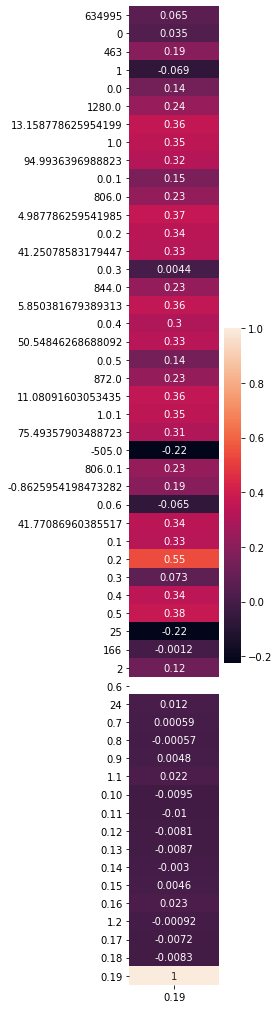

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2, 18))

sns.heatmap(
    corr_matrix[['0.19']],
    square    = False,
    ax        = ax,
    annot     = True
)

ax.tick_params(labelsize = 10)

### Analizo la correlación entre los features

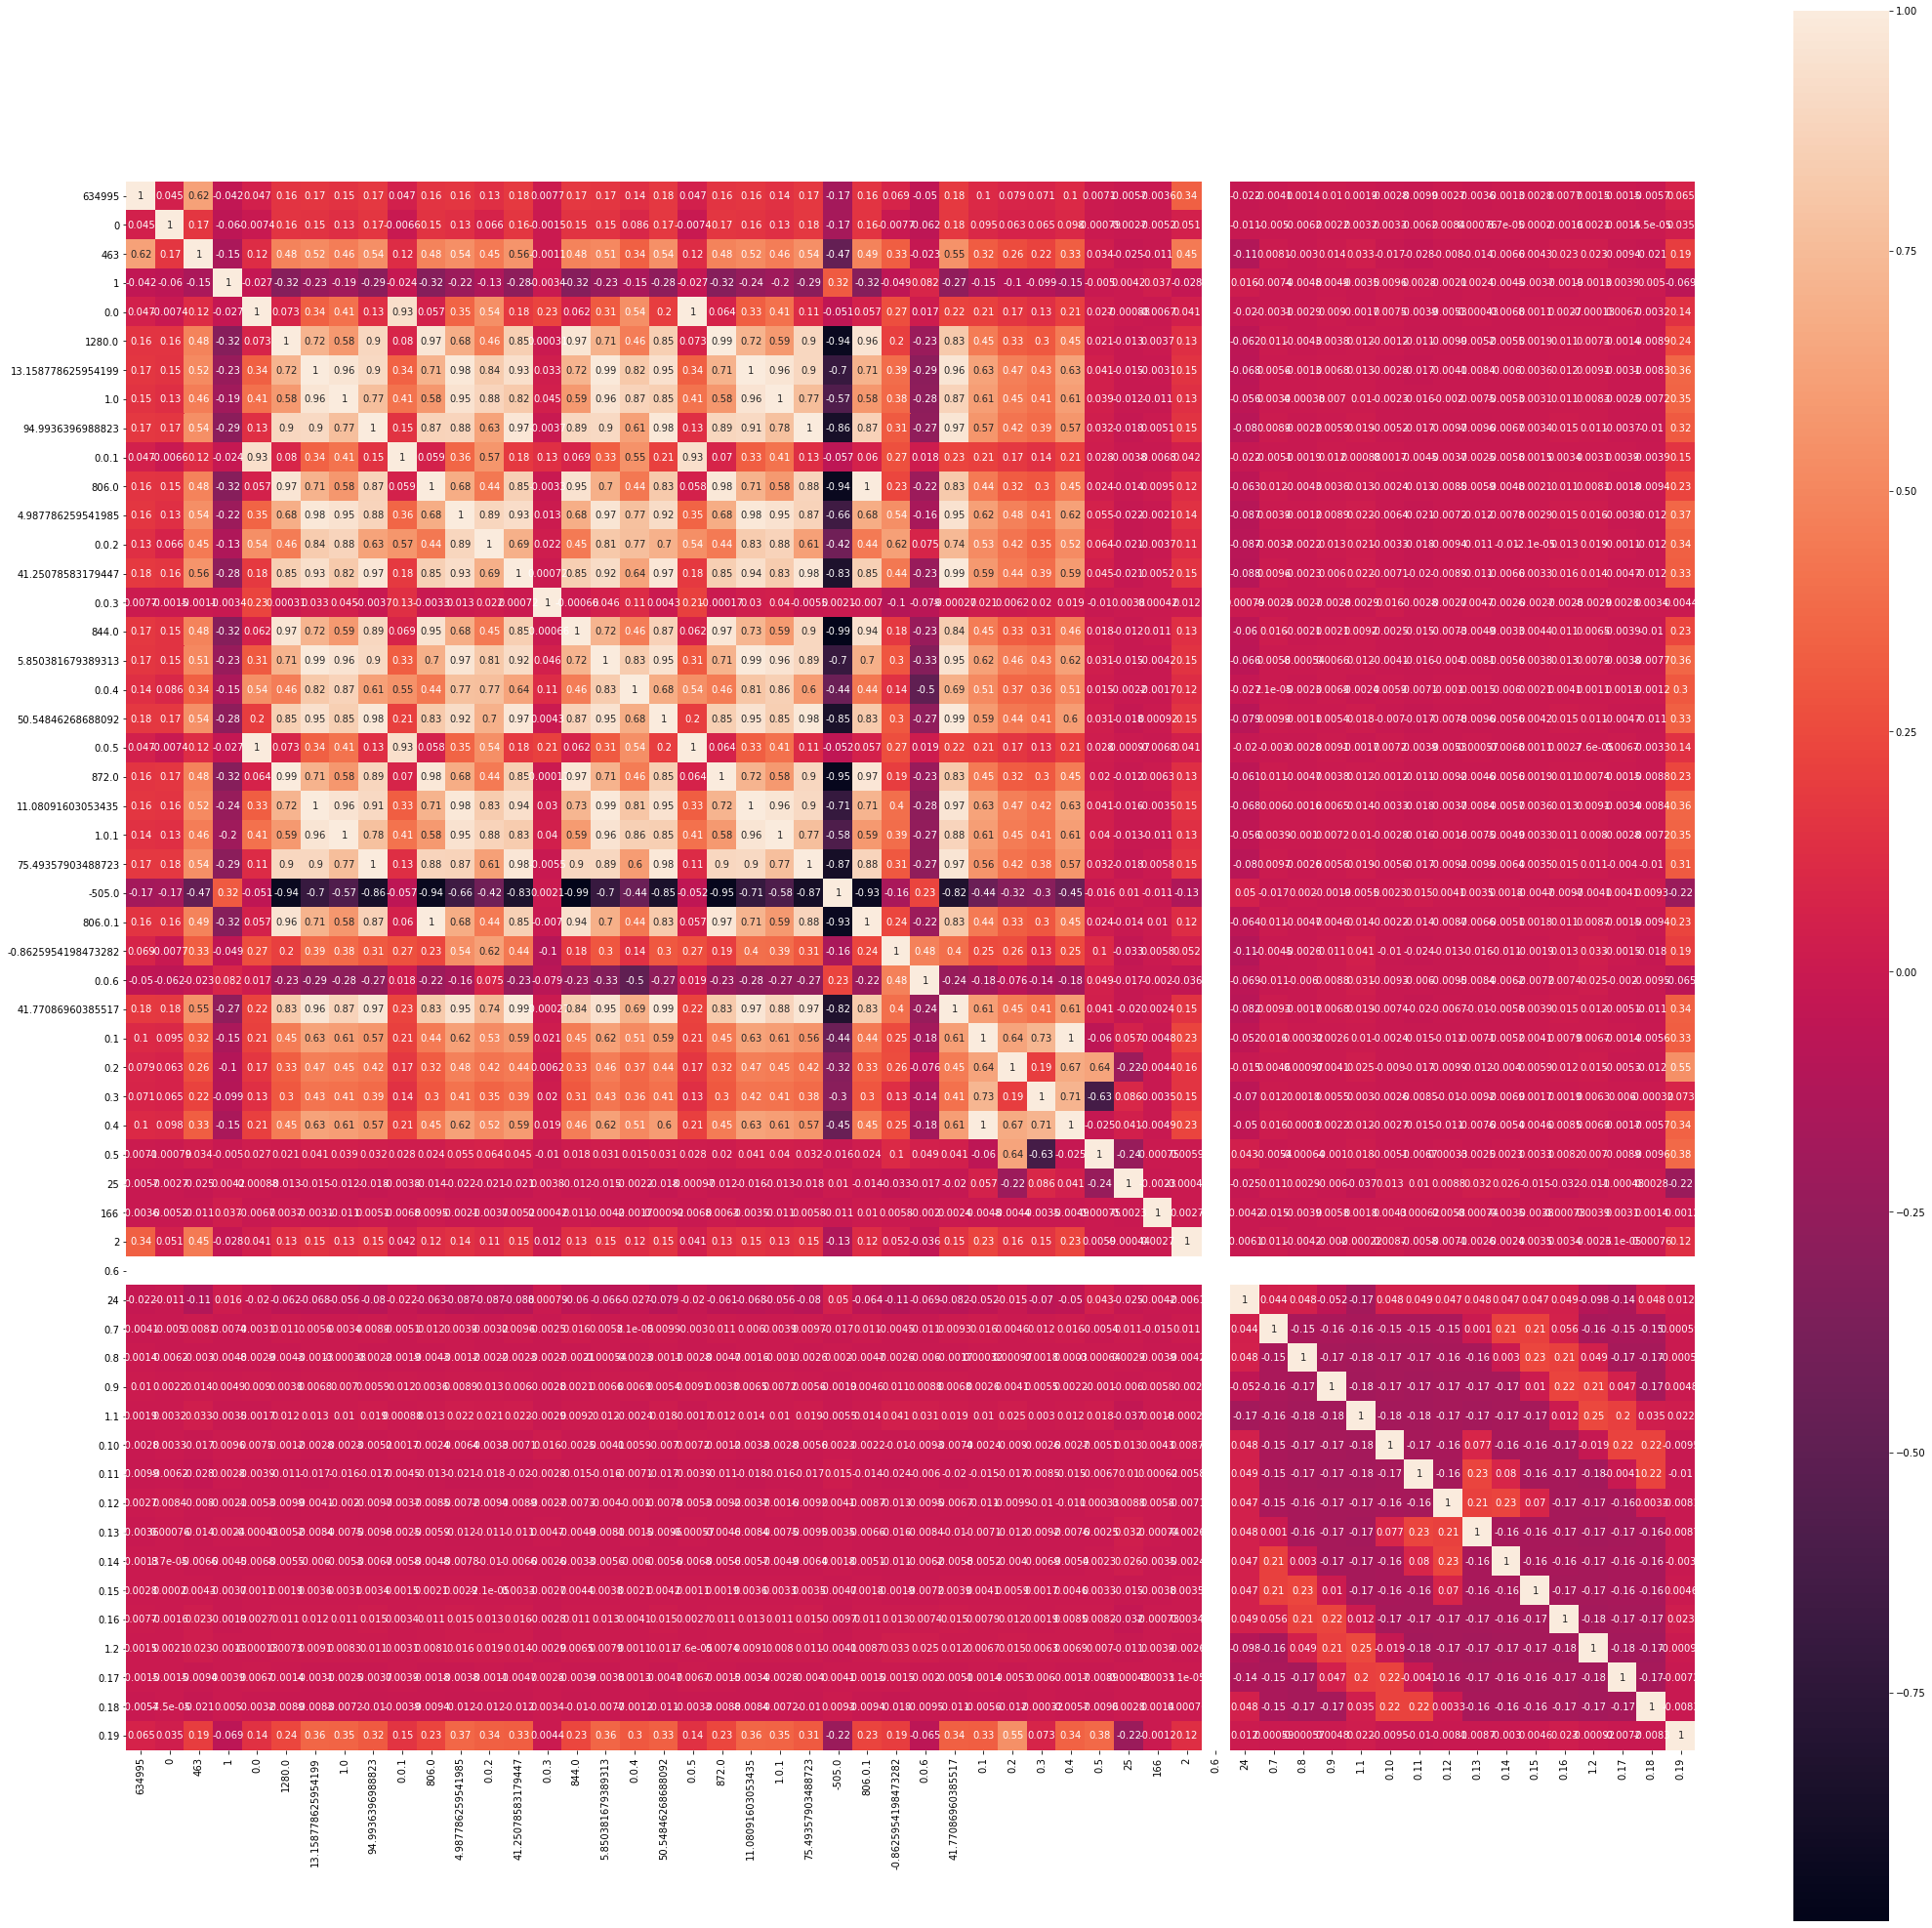

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(36, 36))

sns.heatmap(
    corr_matrix,
    square    = True,
    ax        = ax,
    annot     = True
)

ax.tick_params(labelsize = 10)

plt.savefig("Correlation_HeatMap.png")

### En base a lo anterior, reduzco la dimensionalidad

In [11]:
# Practicamente se remueven todos los features derivados de los features escenciales (del 5 al 29)
data2 = data.drop(data.columns[[5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24]],axis=1)

In [12]:
data2.shape

(199029, 35)

In [13]:
corr_matrix_2 = data2.corr(method='pearson')

In [14]:
corr_matrix_2.shape

(35, 35)

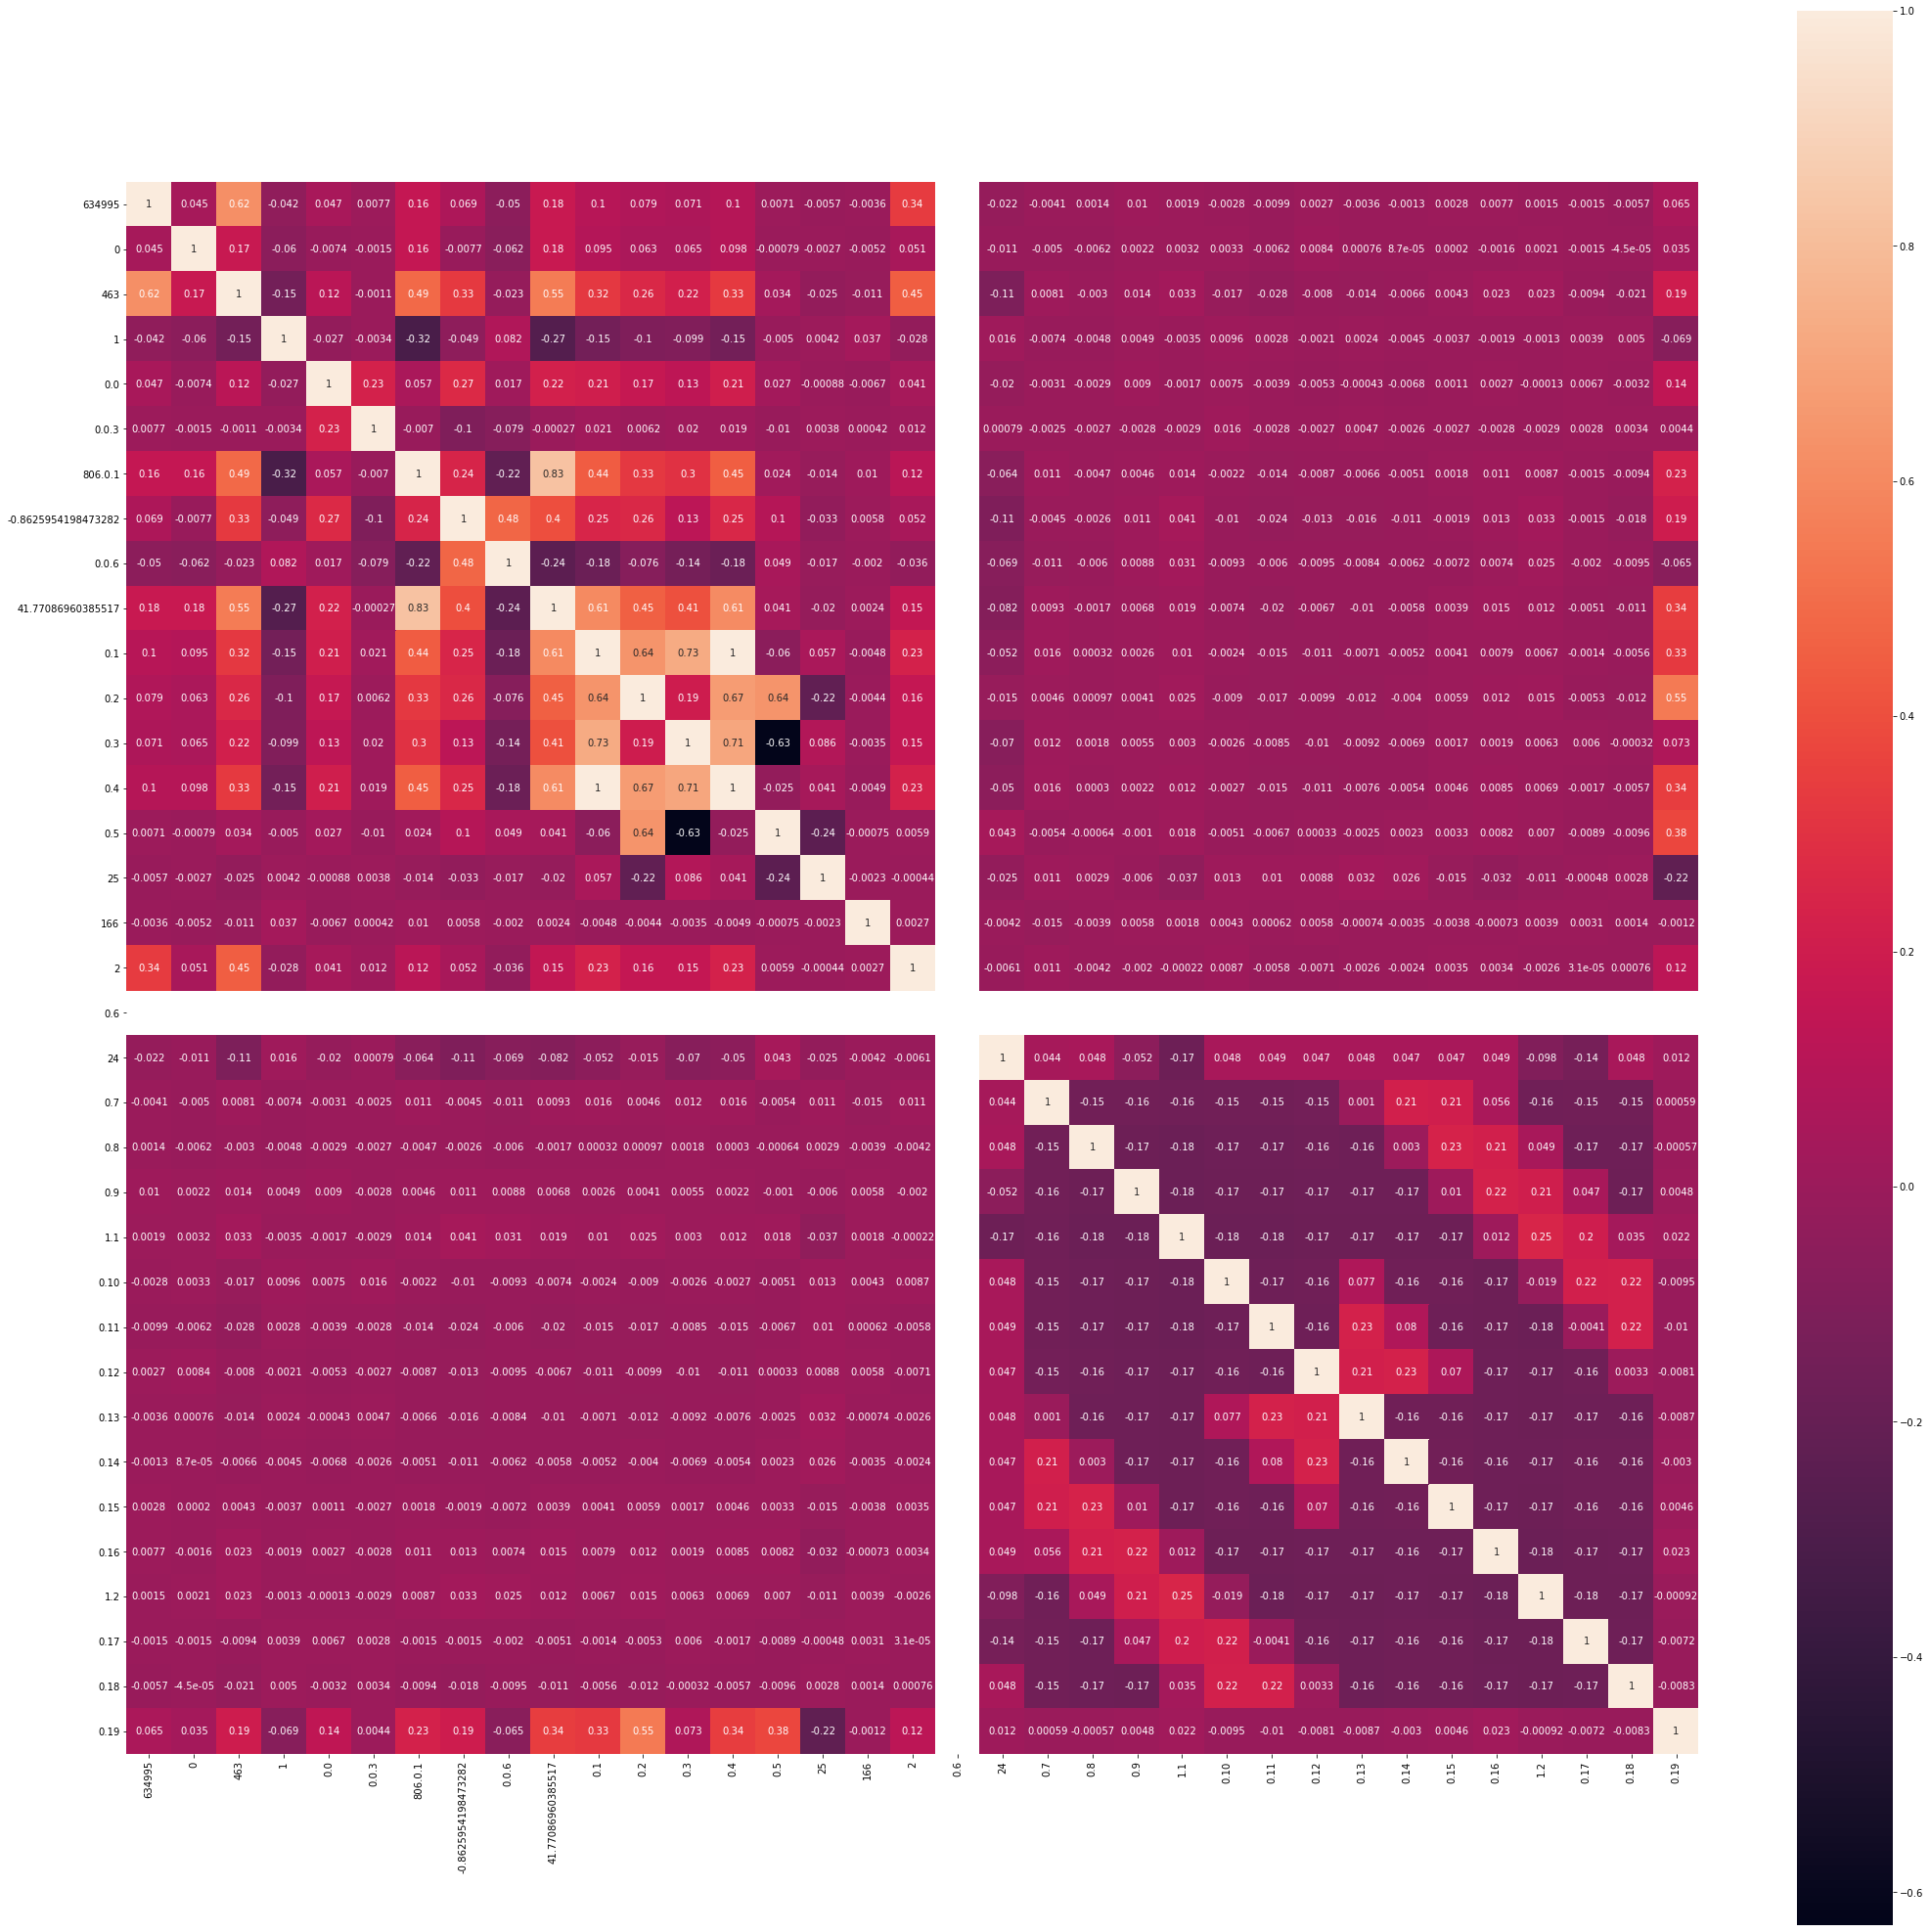

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(36, 36))

sns.heatmap(
    corr_matrix_2,
    square    = True,
    ax        = ax,
    annot     = True
)

ax.tick_params(labelsize = 10)

### Split del dataset de trainning

In [16]:
X_train = data2.drop(data.columns[[53]],axis=1)
y_train = data2[data.columns[[53]]]


In [17]:
X_train.shape

(199029, 34)

In [18]:
y_train.shape

(199029, 1)

### Split del dataset de test

In [19]:
data_test = pd.read_csv("./Dataset/Testing/Features_TestSet.csv")

In [20]:
data_test_2 = data_test.drop(data_test.columns[[5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24]],axis=1)
X_test = data_test_2.drop(data_test.columns[[53]],axis=1)
y_test = data_test_2[data_test.columns[[53]]]

In [21]:
X_test.shape

(10043, 34)

In [22]:
y_test.shape

(10043, 1)

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

### Regresion lineal

In [23]:
modelo_1 = make_pipeline(StandardScaler(with_mean=True), LinearRegression())
modelo_1.fit(X = X_train, y = y_train)
predicciones_1 = modelo_1.predict(X=X_test)
predicciones_1 = predicciones_1.flatten()
rmse_ols = mean_squared_error(y_true  = y_test, y_pred  = predicciones_1, squared = False)
print(f"El error (rmse) de test es: {rmse_ols}")

El error (rmse) de test es: 106.21800101806387


In [24]:
R2 = r2_score(y_test, predicciones_1)
print(R2)

0.14738929913821375


### Ridge regression

In [29]:
# Creación y entrenamiento del modelo. Scikit-Learn usa Cross Validation para encontrar el valor óptimo de alpha

modelo_2 = RidgeCV(
            alphas          = np.logspace(-2, 5, 200),
            fit_intercept   = True,
            normalize       = True,
            store_cv_values = True
         )

_ = modelo_2.fit(X = X_train, y = y_train)

D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.04418e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13229e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.22782e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.3314e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44371e-21): result may not be accu

D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.66574e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.89063e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.13451e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.39895e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.68571e-20): result may not be acc

D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.67718e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.40923e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.0203e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.10638e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.19972e-18): result may not be accu

D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.8243e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.06257e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.32093e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.6011e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.90489e-17): result may not be accur

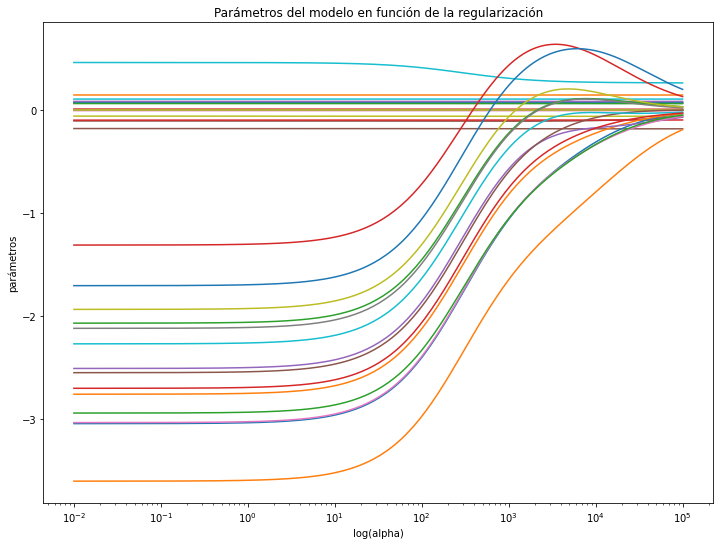

In [30]:
# Evolución de los parámetros en función de alpha

alphas = modelo_2.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(12, 8.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
plt.axis('tight')
plt.show()

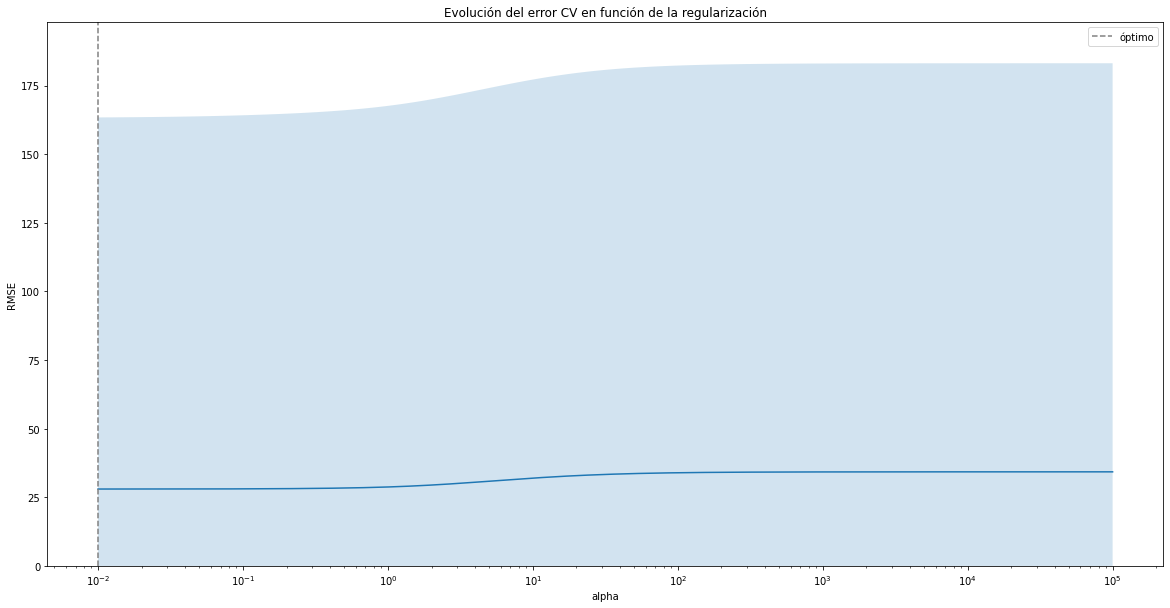

In [31]:
# Evolución del error de validación cruzada en función de alpha

# modelo_2.cv_values almacena el mse de cv para cada valor de alpha. Tiene dimensiones (n_samples, n_targets, n_alphas)

mse_cv = modelo_2.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo_2.cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
optimo       = modelo_2.alphas[np.argmin(rmse_cv)]

# Gráfico del error +- 1 desviación estándar (fill area)
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(modelo_2.alphas, rmse_cv)
ax.fill_between(
    modelo_2.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [34]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {modelo_2.alpha_}")

Mejor valor de alpha encontrado: 0.01


In [35]:
# Predicciones test

predicciones_2 = modelo_2.predict(X = X_test)
predicciones_2 = predicciones_2.flatten()

In [36]:
# Error de test del modelo 

rmse_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones_2,
                squared = False
             )

print(f"El error (rmse) de test es: {rmse_ridge}")

El error (rmse) de test es: 106.19381332917078


In [37]:
R2 = r2_score(y_test, predicciones_2)

In [38]:
R2

0.14777756353991112

### Lasso regression

In [46]:
modelo_3 = LassoCV(
            alphas          = np.logspace(-6, 3, 200),
            normalize       = True,
            cv              = 10
         )

_ = modelo_3.fit(X = X_train, y = y_train.values.ravel())

D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83683.11498722434, tolerance: 24435.919
  model = cd_fast.enet_coordinate_descent(
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163394.08494195342, tolerance: 24435.919
  model = cd_fast.enet_coordinate_descent(
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 478689.95918643475, tolerance: 24435.919
  model = cd_fast.enet_coordinate_descent(
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did n

D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58880614.88860825, tolerance: 24435.919
  model = cd_fast.enet_coordinate_descent(
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60510549.85026499, tolerance: 24435.919
  model = cd_fast.enet_coordinate_descent(
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61928365.48629181, tolerance: 24435.919
  model = cd_fast.enet_coordinate_descent(
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76880246.27415347, tolerance: 24435.919
  model = cd_fast.enet_coordinate_descent(
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77546575.62442996, tolerance: 24435.919
  model = cd_fast.enet_coordinate_descent(
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77688479.59765042, tolerance: 24435.919
  model = cd_fast.enet_coordinate_descent(
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77948103.72632982, tolerance: 24435.919
  model = cd_fast.enet_coordinate_descent(
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77962564.73476806, tolerance: 24435.919
  model = cd_fast.enet_coordinate_descent(
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77962774.75058988, tolerance: 24435.919
  model = cd_fast.enet_coordinate_descent(
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77966172.50228818, tolerance: 24435.919
  model = cd_fast.enet_coordinate_descent(
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77966188.46547692, tolerance: 24435.919
  model = cd_fast.enet_coordinate_descent(
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77966202.84481713, tolerance: 24435.919
  model = cd_fast.enet_coordinate_descent(
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

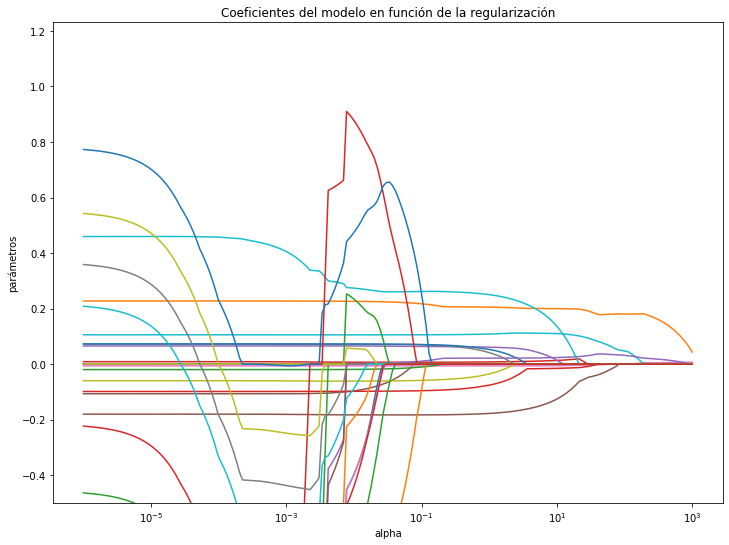

In [47]:
# Evolución de los parámetros en función de alpha

alphas = modelo_3.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(12, 8.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('parámetros')
ax.set_title('Coeficientes del modelo en función de la regularización');

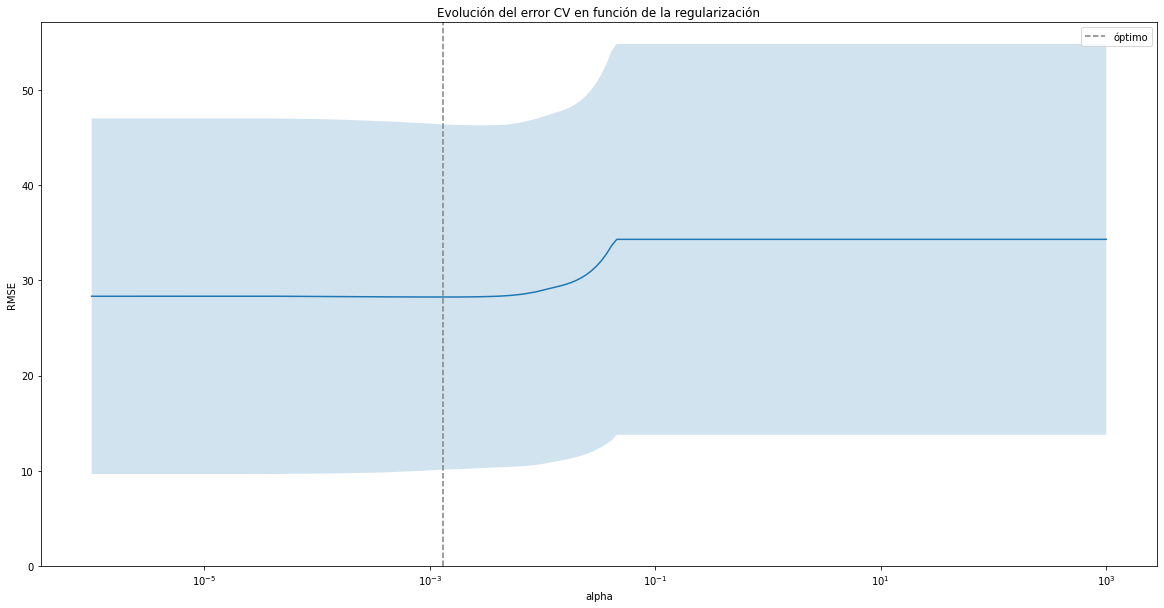

In [48]:
# Evolución del error de validación cruzada en función de alpha

mse_cv = modelo_3.mse_path_.mean(axis=1)
mse_sd = modelo_3.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
optimo       = modelo_3.alphas_[np.argmin(rmse_cv)]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(modelo_3.alphas_, rmse_cv)
ax.fill_between(
    modelo_3.alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend()
plt.show()

In [49]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {modelo_3.alpha_}")

Mejor valor de alpha encontrado: 0.001320088400831418


In [50]:
predicciones_3 = modelo_3.predict(X=X_test)
predicciones_3 = predicciones_3.flatten()

In [51]:
# Error de test del modelo 

rmse_lasso = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones_3,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_lasso}")


El error (rmse) de test es: 106.2066329348401


In [52]:
R2 = r2_score(y_test, predicciones_3)
R2

0.1475717923245814